In [6]:
import pickle
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [13]:
import tensorflow as tf

sess=tf.Session()    
#First let's load meta graph and restore weights

saver1 = tf.train.import_meta_graph('./model.ckpt.meta')
saver1.restore(sess, './model.ckpt')
sess.runner().fetch('Wf_')
# print(sess.run(myVar))

INFO:tensorflow:Restoring parameters from ./model.ckpt


AttributeError: 'Session' object has no attribute 'runner'

In [14]:
sess.graph

Some plotting code follows.

In [8]:
def plot(data, max_iter, gap, file_path, ylabel, xlabel, title, shouldShow=False, shouldSave=False):
    x_offset = 0.1
    y_offset = 0.01
    axes = plt.gca()
    axes.set_xlim([1 - x_offset, max_iter + x_offset])
    p = plt.plot([gap*(x + 1) for x in range(len(data))], data, 'o-',  markersize=4)
    plt.title(title)

    plt.ylabel(ylabel)

    plt.xlabel(xlabel)
    plt.xticks(range(gap, gap*(len(data)+1), gap))

    if shouldShow:
        plt.show()
        
    if shouldSave:
        plt.savefig(file_path + '.png', bbox_inches='tight')  
   


def plot_models(pref, tp, max_iter, gap, xlabel, loss, aer_val, loss_val, aer_test, loglike_label="log Likelihood"):
    
    fig = plt.figure()
    fig.set_figheight(7)
    fig.set_figwidth(14)
    plt.subplots_adjust(hspace=0.3)
    
    fig.add_subplot(221)
    data = [ - el for el in loss]
    file_path = pref + '_loglike_' + tp
    label = loglike_label
    title = tp + " Epoch " + loglike_label
    plot(data, max_iter, gap, file_path, label, xlabel, title)

    fig.add_subplot(222)
    data = [ - el for el in loss_val]
    file_path =  pref + '_loglike_val_' + tp
    label = loglike_label
    title = tp + " Validation set " + loglike_label
    plot(data, max_iter, gap, file_path, label, xlabel, title)
    
    fig.add_subplot(223)
    data = aer_val
    file_path =  pref + '_aer_val_' + tp
    label = "AER"
    title = tp + " Validation set AER"
    plot(data, max_iter, gap, file_path, label, xlabel, title)

    fig.add_subplot(224)
    data = aer_test
    file_path =  pref + '_aer_test_' + tp
    label = "AER"
    title = tp + " Test set AER"
    plot(data, max_iter, gap, file_path, label, xlabel, title)
    plt.show()

For each model, we provide plots for epoch log likelihood, validation set log likelihood, validation set AER and test set AER, taken and saved during training.

## Neural IBM1 (with additional French context)



We first trained the model using just 1000 vocabulary words. Although we expect a restriction like this to affect the accuracy of the model, it also makes the task computationally feasible with our setup. 

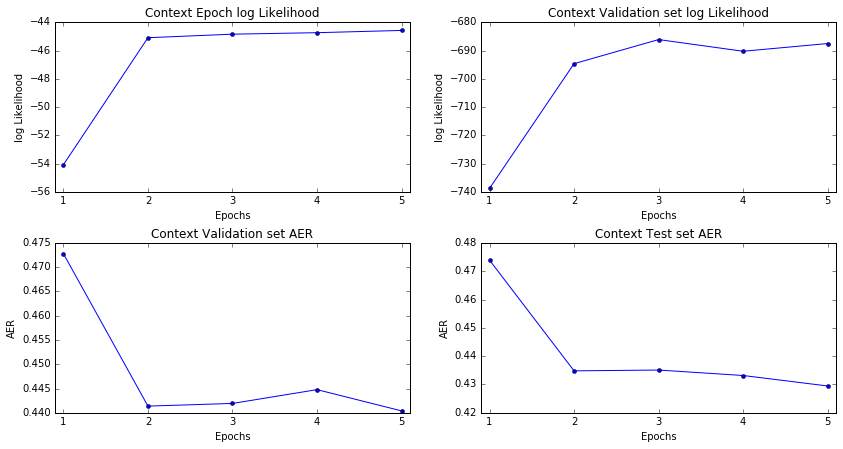

In [138]:
filename = 'stats/NeuralIBM1ContextTrainer_5e_1000v'
lst = pickle.load(open(filename, 'rb'))

loss = lst[0][0::9]
aer_val = lst[2][0::9]
loss_val = lst[1][0::9]
aer_test = lst[3][0::9]

tp = 'Context'
pref = "allepochs"
xlabel = 'Epochs'
max_iter = 5
gap = 1
plot_models(pref, tp, max_iter, gap, xlabel, loss, aer_val, loss_val, aer_test)

With 1000 words, the training is quickly converging as seen above, to show more insightful information, we plot the same metrics only the first epoch, recorded after specific number of batches have been trained.

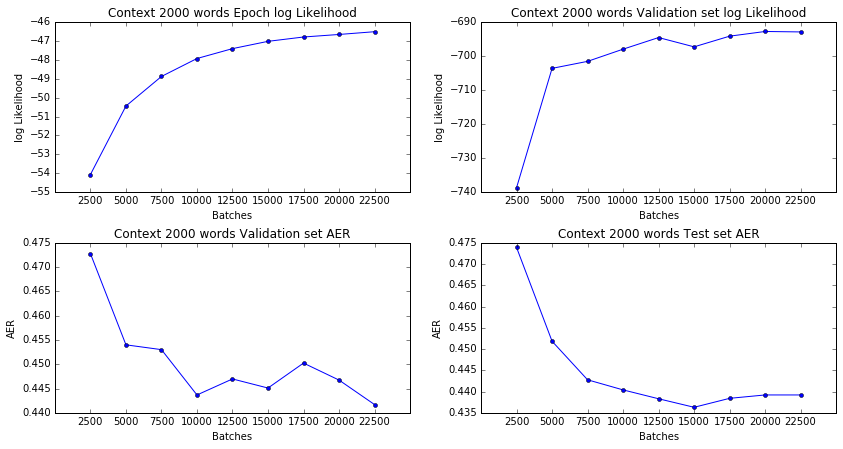

In [12]:
filename = 'stats/NeuralIBM1ContextTrainer_5e_1000v'
lst = pickle.load(open(filename, 'rb'))

loss = lst[0][0:9]
aer_val = lst[2][0:9]
loss_val = lst[1][0:9]
aer_test = lst[3][0:9]

tp = 'Context 2000 words'
pref = "iterations"
xlabel = 'Batches'
max_iter = 25000
gap = 2500

plot_models(pref, tp, max_iter, gap, xlabel, loss, aer_val, loss_val, aer_test)

We also trained using 4000 vocabulary words to achieve better accuracy. The results are shown below.

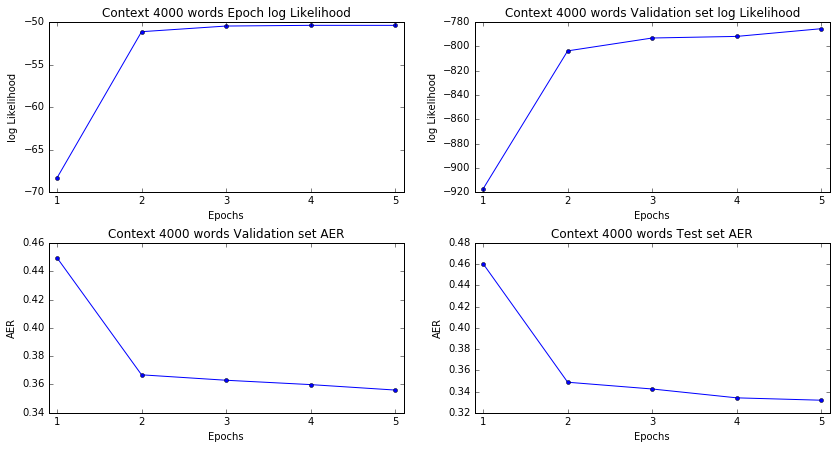

In [11]:
filename = 'stats/NeuralIBM1ContextTrainer_5e_4000v'
lst = pickle.load(open(filename, 'rb'))

loss = lst[0][0::9]
aer_val = lst[2][0::9]
loss_val = lst[1][0::9]
aer_test = lst[3][0::9]

tp = 'Context 4000 words'
pref = "allepochs"
xlabel = 'Epochs'
max_iter = 5
gap = 1
plot_models(pref, tp, max_iter, gap, xlabel, loss, aer_val, loss_val, aer_test)

## Neural IBM1 with collocations

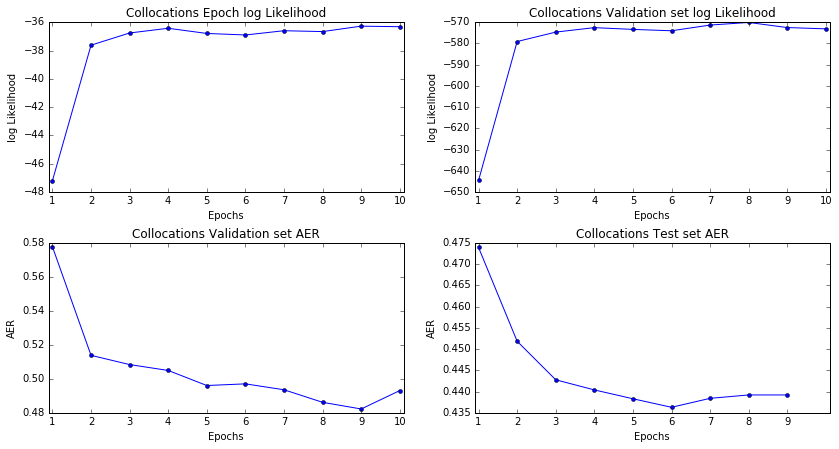

In [137]:
filename = 'stats/collocations2'

lst = pickle.load(open(filename, 'rb'))

loss = lst[0][0::9]
aer_val = lst[1][0::9]
loss_val = lst[2][0::9]
epoch_aer_test = lst[3][0::9]

tp = 'Collocations'
pref = "allepochs"
xlabel = 'Epochs'
max_iter = 10
gap = 1

plot_models(pref, tp, max_iter, gap, xlabel, loss, aer_val, loss_val, aer_test)

## Neural IBM1 with collocations: latent gate